#### Performing correlation analysis to support the claim that if the government of Tanzania increase its budget towards health, then its maternity and infant mortality rates will reduce.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [3]:
#fetching government expenses file
data_budget = pd.read_csv('https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Health%20%26%20Wellbeing/Government%20spending%20on%20health%20in%20Africa%202000-2020.csv')
gov_budget = pd.DataFrame(data_budget)
gov_budget.head(10)

,"Source : One Data, 2020\nOrigin: WHO, Global Health Expenditure Database, IMF World Economic Outlook",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,This dataset contains information on governmen...,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,Tanzania,South Africa,Kenya,Uganda,Africa
4,1/1/2000,6.052,11.855,7.089,8.335,7.187
5,1/1/2001,8.799,10.623,7.089,8.335,7.014
6,1/1/2002,9.788,10.38,7.089,8.752,7.056
7,1/1/2003,9.709,12.338,7.022,8.955,7.362
8,1/1/2004,11.553,12.029,6.989,8.773,7.517
9,1/1/2005,12.62,10.919,6.892,7.138,7.32


In [4]:
gov_budget = gov_budget.iloc[3:].reset_index(drop=True)
gov_budget.head(10)

,"Source : One Data, 2020\nOrigin: WHO, Global Health Expenditure Database, IMF World Economic Outlook",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Year,Tanzania,South Africa,Kenya,Uganda,Africa
1,1/1/2000,6.052,11.855,7.089,8.335,7.187
2,1/1/2001,8.799,10.623,7.089,8.335,7.014
3,1/1/2002,9.788,10.38,7.089,8.752,7.056
4,1/1/2003,9.709,12.338,7.022,8.955,7.362
5,1/1/2004,11.553,12.029,6.989,8.773,7.517
6,1/1/2005,12.62,10.919,6.892,7.138,7.32
7,1/1/2006,13.509,13.095,6.813,7.17,7.829
8,1/1/2007,10.887,13.509,7.039,7.819,7.414
9,1/1/2008,12.486,13.015,7.171,7.287,7.081


In [5]:
#renaming columns
gov_budget.rename(columns = {
    'Source : One Data, 2020\nOrigin: WHO, Global Health Expenditure Database, IMF World Economic Outlook': 'Year',
    'Unnamed: 1': 'Africa',
    'Unnamed: 2': 'Tanzania',
    'Unnamed: 3': 'Kenya',
    'Unnamed: 4': 'Uganda',
    'Unnamed: 5': 'South Africa'
},inplace=True)

In [6]:
gov_budget.head(20)

,Year,Africa,Tanzania,Kenya,Uganda,South Africa
0,Year,Tanzania,South Africa,Kenya,Uganda,Africa
1,1/1/2000,6.052,11.855,7.089,8.335,7.187
2,1/1/2001,8.799,10.623,7.089,8.335,7.014
3,1/1/2002,9.788,10.38,7.089,8.752,7.056
4,1/1/2003,9.709,12.338,7.022,8.955,7.362
5,1/1/2004,11.553,12.029,6.989,8.773,7.517
6,1/1/2005,12.62,10.919,6.892,7.138,7.32
7,1/1/2006,13.509,13.095,6.813,7.17,7.829
8,1/1/2007,10.887,13.509,7.039,7.819,7.414
9,1/1/2008,12.486,13.015,7.171,7.287,7.081


In [7]:
gov_budget = gov_budget.iloc[1:].reset_index(drop=True)
gov_budget.head(10)

,Year,Africa,Tanzania,Kenya,Uganda,South Africa
0,1/1/2000,6.052,11.855,7.089,8.335,7.187
1,1/1/2001,8.799,10.623,7.089,8.335,7.014
2,1/1/2002,9.788,10.38,7.089,8.752,7.056
3,1/1/2003,9.709,12.338,7.022,8.955,7.362
4,1/1/2004,11.553,12.029,6.989,8.773,7.517
5,1/1/2005,12.62,10.919,6.892,7.138,7.32
6,1/1/2006,13.509,13.095,6.813,7.17,7.829
7,1/1/2007,10.887,13.509,7.039,7.819,7.414
8,1/1/2008,12.486,13.015,7.171,7.287,7.081
9,1/1/2009,7.584,13.37,7.201,7.041,7.273


In [8]:
#fetching the source of funds for TZ file from github
source_fin_tz = pd.read_csv("https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Health%20%26%20Wellbeing/Source%20of%20health%20funds%20in%20Tanzania%20from%202000%20to%202020.csv")
fin_tz = pd.DataFrame(source_fin_tz)
fin_tz.head(10)

,"Source : One data 2024\n\nOrigin: Word Health Organization, Global Health Expenditure database",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,This dataset contains information on the sourc...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,year,Out-of-pocket,Domestic Government,External Aid,Other domestic private,NaN,NaN
4,2020,23.1,42.85,33.2,0.85,NaN,
5,2019,21.91,40.49,36.78,0.81,NaN,NaN
6,2018,20.84,37.56,40.83,0.77,NaN,NaN
7,2017,21.35,38.65,39.21,0.79,NaN,NaN
8,2016,21.89,40.62,36.41,1.07,NaN,NaN
9,2015,25.83,34.45,37.84,1.88,NaN,NaN


In [9]:
fin_tz = fin_tz.iloc[3:].reset_index(drop=True)
fin_tz.head(10)

,"Source : One data 2024\n\nOrigin: Word Health Organization, Global Health Expenditure database",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,year,Out-of-pocket,Domestic Government,External Aid,Other domestic private,NaN,NaN
1,2020,23.1,42.85,33.2,0.85,NaN,
2,2019,21.91,40.49,36.78,0.81,NaN,NaN
3,2018,20.84,37.56,40.83,0.77,NaN,NaN
4,2017,21.35,38.65,39.21,0.79,NaN,NaN
5,2016,21.89,40.62,36.41,1.07,NaN,NaN
6,2015,25.83,34.45,37.84,1.88,NaN,NaN
7,2014,25.98,29.87,43.57,0.57,NaN,NaN
8,2013,24.09,25.51,48.49,1.92,NaN,NaN
9,2012,24.69,23.43,48.33,3.55,NaN,NaN


In [10]:
#Renaming the columns
fin_tz.rename(columns = {
    'Source : One data 2024\n\nOrigin: Word Health Organization, Global Health Expenditure database': 'Year',
    'Unnamed: 1': 'Domestic Government',
    'Unnamed: 2': 'External Aid',
    'Unnamed: 3': 'Other domestic private',
    'Unnamed: 4': 'Out-of-pocket',
    'Unnamed: 5': 'South Africa'
},inplace=True)

In [11]:
fin_tz.head(5)

,Year,Domestic Government,External Aid,Other domestic private,Out-of-pocket,South Africa,Unnamed: 6
0,year,Out-of-pocket,Domestic Government,External Aid,Other domestic private,NaN,NaN
1,2020,23.1,42.85,33.2,0.85,NaN,
2,2019,21.91,40.49,36.78,0.81,NaN,NaN
3,2018,20.84,37.56,40.83,0.77,NaN,NaN
4,2017,21.35,38.65,39.21,0.79,NaN,NaN


In [12]:
fin_tz = fin_tz.iloc[1:].reset_index(drop=True)
fin_tz.head(10)

,Year,Domestic Government,External Aid,Other domestic private,Out-of-pocket,South Africa,Unnamed: 6
0,2020,23.1,42.85,33.2,0.85,NaN,
1,2019,21.91,40.49,36.78,0.81,NaN,NaN
2,2018,20.84,37.56,40.83,0.77,NaN,NaN
3,2017,21.35,38.65,39.21,0.79,NaN,NaN
4,2016,21.89,40.62,36.41,1.07,NaN,NaN
5,2015,25.83,34.45,37.84,1.88,NaN,NaN
6,2014,25.98,29.87,43.57,0.57,NaN,NaN
7,2013,24.09,25.51,48.49,1.92,NaN,NaN
8,2012,24.69,23.43,48.33,3.55,NaN,NaN
9,2011,27.95,25.45,44.91,1.68,NaN,NaN


In [13]:
#df.drop(columns=columns_to_delete, inplace=True)
fin_tz.drop(columns = ['South Africa', 'Unnamed: 6'], inplace = True)

In [14]:
fin_tz.head(10)

,Year,Domestic Government,External Aid,Other domestic private,Out-of-pocket
0,2020,23.1,42.85,33.2,0.85
1,2019,21.91,40.49,36.78,0.81
2,2018,20.84,37.56,40.83,0.77
3,2017,21.35,38.65,39.21,0.79
4,2016,21.89,40.62,36.41,1.07
5,2015,25.83,34.45,37.84,1.88
6,2014,25.98,29.87,43.57,0.57
7,2013,24.09,25.51,48.49,1.92
8,2012,24.69,23.43,48.33,3.55
9,2011,27.95,25.45,44.91,1.68


In [15]:
#fetching the source of funds for SA file from github
source_fin_sa = pd.read_csv("https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Health%20%26%20Wellbeing/Source%20of%20Health%20funds%20in%20South%20Africa%20from%202000%20to%202020.csv")
fin_sa = pd.DataFrame(source_fin_sa)
fin_sa.head(10)

,"Source : One data 2024\n\nOrigin: Word Health Organization, Global Health Expenditure database",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,This dataset contains information on the sourc...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,year,Domestic Government,Other domestic private,Out-of-pocket,External Aid
3,2020,62.1,31.2,5.36,1.34
4,2019,58.44,34.71,5.72,1.13
5,2018,57.24,35.8,5.83,1.14
6,2017,57.23,35.85,5.83,1.09
7,2016,56.6,35.57,5.79,2.04
8,2015,57.08,35.51,5.74,1.67
9,2014,55.56,37.04,5.66,1.73


In [16]:
fin_sa = fin_sa.iloc[3:].reset_index(drop=True)
fin_sa.head(10)

,"Source : One data 2024\n\nOrigin: Word Health Organization, Global Health Expenditure database",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,2020,62.1,31.2,5.36,1.34
1,2019,58.44,34.71,5.72,1.13
2,2018,57.24,35.8,5.83,1.14
3,2017,57.23,35.85,5.83,1.09
4,2016,56.6,35.57,5.79,2.04
5,2015,57.08,35.51,5.74,1.67
6,2014,55.56,37.04,5.66,1.73
7,2013,51.15,34.5,7.61,6.74
8,2012,51.73,33.92,7.72,6.63
9,2011,51.87,33.29,7.75,7.1


In [17]:
fin_sa.rename(columns = {
    'Source : One data 2024\n\nOrigin: Word Health Organization, Global Health Expenditure database': 'Year',
    'Unnamed: 1': 'Domestic Government',
    'Unnamed: 2': 'External Aid',
    'Unnamed: 3': 'Other domestic private',
    'Unnamed: 4': 'Out-of-pocket',
},inplace=True)

In [18]:
fin_sa.head(10)

,Year,Domestic Government,External Aid,Other domestic private,Out-of-pocket
0,2020,62.1,31.2,5.36,1.34
1,2019,58.44,34.71,5.72,1.13
2,2018,57.24,35.8,5.83,1.14
3,2017,57.23,35.85,5.83,1.09
4,2016,56.6,35.57,5.79,2.04
5,2015,57.08,35.51,5.74,1.67
6,2014,55.56,37.04,5.66,1.73
7,2013,51.15,34.5,7.61,6.74
8,2012,51.73,33.92,7.72,6.63
9,2011,51.87,33.29,7.75,7.1


In [20]:
# Reading data from github
data_infant_sa = pd.read_csv("https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Health%20%26%20Wellbeing/Infant%20Mortality%20rate%20South%20Africa%201974%20-2022.csv")
infant_sa = pd.DataFrame(data_infant_sa)
infant_sa .head(10)

,"Source: UN Inter-agency Group for Child Mortality Estimation (UN IGME), 2024",Unnamed: 1
0,NaN,NaN
1,This dataset contains information on Infant mo...,NaN
2,NaN,NaN
3,Year,Infant Mortality Rate
4,1975,90.56148874
5,1976,86.47257856
6,1977,82.56626418
7,1978,78.78591995
8,1979,75.23073243
9,1980,71.84569275


In [21]:
infant_sa = infant_sa.iloc[3:].reset_index(drop=True)
infant_sa.head(10)

,"Source: UN Inter-agency Group for Child Mortality Estimation (UN IGME), 2024",Unnamed: 1
0,Year,Infant Mortality Rate
1,1975,90.56148874
2,1976,86.47257856
3,1977,82.56626418
4,1978,78.78591995
5,1979,75.23073243
6,1980,71.84569275
7,1981,68.69600834
8,1982,65.7867776
9,1983,63.05977871


In [22]:
infant_sa.rename(columns = {
    'Source: UN Inter-agency Group for Child Mortality Estimation (UN IGME), 2024': 'Year',
    'Unnamed: 1': 'Infant Mortality Rate'
},inplace=True)
infant_sa.head(20)

,Year,Infant Mortality Rate
0,Year,Infant Mortality Rate
1,1975,90.56148874
2,1976,86.47257856
3,1977,82.56626418
4,1978,78.78591995
5,1979,75.23073243
6,1980,71.84569275
7,1981,68.69600834
8,1982,65.7867776
9,1983,63.05977871


In [23]:
infant_sa = infant_sa.iloc[1:].reset_index(drop=True)
infant_sa.tail(10)

,Year,Infant Mortality Rate
39,2014,31.12650317
40,2015,30.41396916
41,2016,29.75998486
42,2017,29.36960113
43,2018,28.89449305
44,2019,28.50677368
45,2020,28.23286065
46,2021,28.07582632
47,2022,27.83471437
48,2023,27.70966103


In [24]:
infant_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   49 non-null     object
 1   Infant Mortality Rate  49 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes


In [25]:
infant_sa['Year'] = infant_sa['Year'].astype(float)
infant_sa['Infant Mortality Rate'] = infant_sa['Infant Mortality Rate'].astype(float)
infant_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   49 non-null     float64
 1   Infant Mortality Rate  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [26]:
sa_infant = infant_sa[(infant_sa['Year'] >= 2000) & (infant_sa['Year'] <= 2020)]
sa_infant.head(10)

,Year,Infant Mortality Rate
25,2000.0,47.995156
26,2001.0,48.974055
27,2002.0,49.375195
28,2003.0,49.797274
29,2004.0,49.710898
30,2005.0,49.563550
31,2006.0,49.876716
32,2007.0,49.125099
33,2008.0,47.460150
34,2009.0,44.025250


In [27]:
data_infant_tz = pd.read_csv("https://raw.githubusercontent.com/AWJP/AWJP-data/refs/heads/main/Health%20%26%20Wellbeing/Infant%20Mortality%20rate%20in%20Tanzania%202000%20-%202022.csv")
infant_tz = pd.DataFrame(data_infant_tz)
infant_tz .head(10)

,"Source: UN Inter-agency Group for Child Mortality Estimation (UN IGME), 2024",Unnamed: 1
0,NaN,NaN
1,This dataset contains information on Infant mo...,NaN
2,NaN,NaN
3,Year,Infant Mortality Rate
4,2022,30.04795829
5,2021,31.06088246
6,2020,32.07766082
7,2019,33.30455602
8,2018,34.48749397
9,2017,36.05822009


In [28]:
infant_tz = infant_tz.iloc[3:].reset_index(drop=True)
infant_tz.head(10)

,"Source: UN Inter-agency Group for Child Mortality Estimation (UN IGME), 2024",Unnamed: 1
0,Year,Infant Mortality Rate
1,2022,30.04795829
2,2021,31.06088246
3,2020,32.07766082
4,2019,33.30455602
5,2018,34.48749397
6,2017,36.05822009
7,2016,37.72180749
8,2015,39.06708652
9,2014,40.08104273


In [29]:
infant_tz.rename(columns = {
    'Source: UN Inter-agency Group for Child Mortality Estimation (UN IGME), 2024': 'Year',
    'Unnamed: 1': 'Infant Mortality Rate'
},inplace=True)
infant_tz.head(20)

,Year,Infant Mortality Rate
0,Year,Infant Mortality Rate
1,2022,30.04795829
2,2021,31.06088246
3,2020,32.07766082
4,2019,33.30455602
5,2018,34.48749397
6,2017,36.05822009
7,2016,37.72180749
8,2015,39.06708652
9,2014,40.08104273


In [30]:
infant_tz = infant_tz.iloc[1:].reset_index(drop=True)
infant_tz.head(10)

,Year,Infant Mortality Rate
0,2022,30.04795829
1,2021,31.06088246
2,2020,32.07766082
3,2019,33.30455602
4,2018,34.48749397
5,2017,36.05822009
6,2016,37.72180749
7,2015,39.06708652
8,2014,40.08104273
9,2013,41.22700903


In [31]:
infant_tz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   23 non-null     object
 1   Infant Mortality Rate  23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


In [32]:
infant_tz['Year'] = infant_tz['Year'].astype(float)
infant_tz['Infant Mortality Rate'] = infant_tz['Infant Mortality Rate'].astype(float)
infant_tz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   23 non-null     float64
 1   Infant Mortality Rate  23 non-null     float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [33]:
tz_infant = infant_tz[(infant_tz['Year'] >= 2000) & (infant_tz['Year'] <= 2020)]
tz_infant.head(10)

,Year,Infant Mortality Rate
2,2020.0,32.077661
3,2019.0,33.304556
4,2018.0,34.487494
5,2017.0,36.058220
6,2016.0,37.721807
7,2015.0,39.067087
8,2014.0,40.081043
9,2013.0,41.227009
10,2012.0,42.403648
11,2011.0,43.819083


In [34]:
# Saving the cleaned data files.
sa_infant.to_csv('sa_mortality.csv', index=False)
fin_sa.to_csv('source_sa.csv', index = False)
fin_tz.to_csv('source_tz.csv', index = False)
gov_budget.to_csv('gov_budget.csv', index = False)
tz_infant.to_csv('tz_infant.csv', index = False)

## Data Analysis

##### Fetching the cleaned data

In [35]:
data_tz_infant = pd.read_csv('tz_infant.csv')
tz_mortality = pd.DataFrame(data_tz_infant)
tz_mortality.head(10)

,Year,Infant Mortality Rate
0,2020.0,32.077661
1,2019.0,33.304556
2,2018.0,34.487494
3,2017.0,36.058220
4,2016.0,37.721807
5,2015.0,39.067087
6,2014.0,40.081043
7,2013.0,41.227009
8,2012.0,42.403648
9,2011.0,43.819083


In [36]:
tz_mortality['Year'] = tz_mortality['Year'].astype(int)
tz_mortality['Infant Mortality Rate'] = tz_mortality['Infant Mortality Rate'].round(2)

In [37]:
data_tz_source = pd.read_csv('source_tz.csv')
tz_funds = pd.DataFrame(data_tz_source)
tz_funds.head(10)

,Year,Domestic Government,External Aid,Other domestic private,Out-of-pocket
0,2020,23.10,42.85,33.20,0.85
1,2019,21.91,40.49,36.78,0.81
2,2018,20.84,37.56,40.83,0.77
3,2017,21.35,38.65,39.21,0.79
4,2016,21.89,40.62,36.41,1.07
5,2015,25.83,34.45,37.84,1.88
6,2014,25.98,29.87,43.57,0.57
7,2013,24.09,25.51,48.49,1.92
8,2012,24.69,23.43,48.33,3.55
9,2011,27.95,25.45,44.91,1.68


In [38]:
data_sa_source = pd.read_csv('source_sa.csv')
sa_funds = pd.DataFrame(data_sa_source)
sa_funds.head(10)

,Year,Domestic Government,External Aid,Other domestic private,Out-of-pocket
0,2020,62.10,31.20,5.36,1.34
1,2019,58.44,34.71,5.72,1.13
2,2018,57.24,35.80,5.83,1.14
3,2017,57.23,35.85,5.83,1.09
4,2016,56.60,35.57,5.79,2.04
5,2015,57.08,35.51,5.74,1.67
6,2014,55.56,37.04,5.66,1.73
7,2013,51.15,34.50,7.61,6.74
8,2012,51.73,33.92,7.72,6.63
9,2011,51.87,33.29,7.75,7.10


In [39]:
data_sa_infant = pd.read_csv('sa_mortality.csv')
sa_mortality = pd.DataFrame(data_sa_infant)
sa_mortality.head(10)

,Year,Infant Mortality Rate
0,2000.0,47.995156
1,2001.0,48.974055
2,2002.0,49.375195
3,2003.0,49.797274
4,2004.0,49.710898
5,2005.0,49.563550
6,2006.0,49.876716
7,2007.0,49.125099
8,2008.0,47.460150
9,2009.0,44.025250


In [40]:
# Changing data types and roundig the values to two decimal places
sa_mortality['Year'] = sa_mortality['Year'].astype(int)
sa_mortality['Infant Mortality Rate'] = sa_mortality['Infant Mortality Rate'].round(2)

In [41]:
# combining the infant mortality data and sources of funds for health for both South Africa, sa, and Tanzania
sa_data = pd.merge(sa_mortality, sa_funds, on="Year")
tz_data = pd.merge(tz_mortality, tz_funds, on="Year")

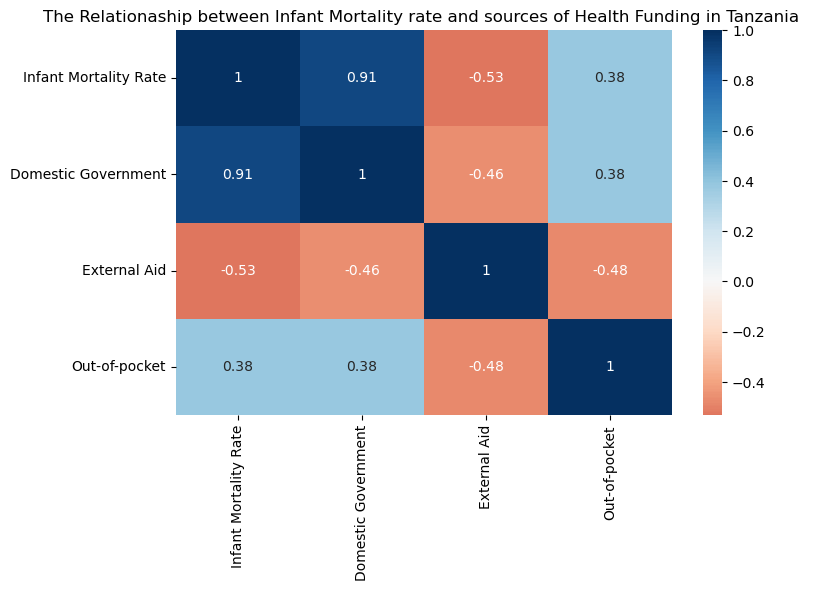

In [42]:
# visualizing the correlation between sources of funds and infant mortality in Tanzania
tz_corr_matrix = tz_data[['Infant Mortality Rate', 'Domestic Government','External Aid','Out-of-pocket']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(tz_corr_matrix, annot=True,cmap='RdBu', center=0)
plt.title('The Relationaship between Infant Mortality rate and sources of Health Funding in Tanzania ')
plt.show()

### The relationship between the sources of health funding and infant mortality in Tanzania:

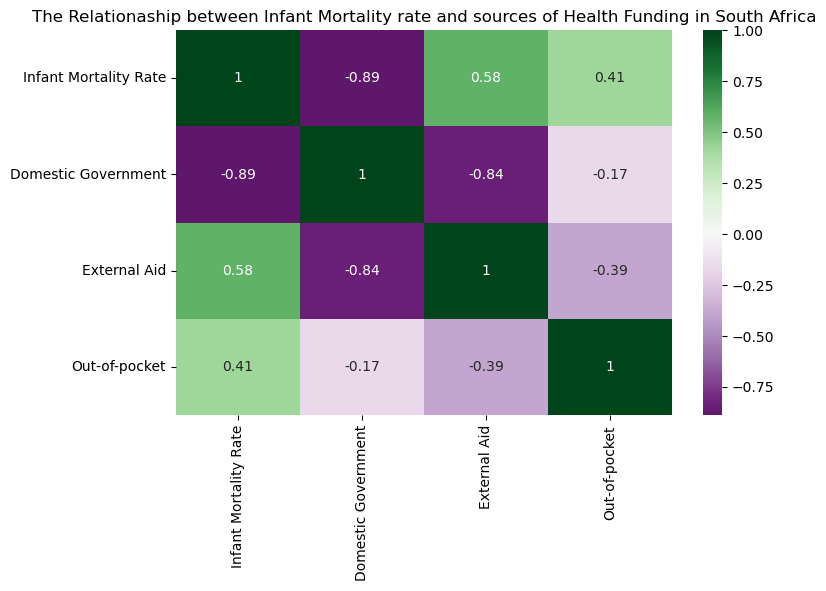

In [43]:
# visualizing the correlation between sources of funds and infant mortality in SA
sa_corr_matrix = sa_data[['Infant Mortality Rate', 'Domestic Government','External Aid','Out-of-pocket']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(sa_corr_matrix, annot=True,cmap='PRGn', center=0)
plt.title('The Relationaship between Infant Mortality rate and sources of Health Funding in South Africa')
plt.show()

### The relationship between the sources of health funding and infant mortality in South Africa:

- The main source of funding health in South Africa is the domestic government expenditure which covers over 50% of the total medical expense in the country.
- From the graph below, there is a negative correlation between government expenditure and infant mortality with a score of -0.92. 
- The score shows that there is a very strong relationship between government expenditure and infant mortality, an increase in government expenditure leads to a decrease in infant mortality.
-There is also a strong positive relationship between out-of-pocket expenditure and infant mortality, with a score of 0.92, indicating that when out-of-pocket expenditure increases, infant mortality also increases.


#### Conclusion:

The Tanzanian government should uphold its commitment to the Abuja declaration of allocating at least 15% of its budget towards health. From the data above, when government expenditure towards health increases, infant mortality decreases, when out-of-pocket expenditure increases infant mortality increases.
